In [97]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1) As per 538, the Jets have a 40% chance of winning next week's game. What distribution can we use to map out this experiment? What inputs will go into this distribution? What are the PMFs and CDFs of all of the possible outcomes in the sample space for this scenario?

We can use the Bernouli Distribution to map out this experiment. Past winnings, team player's statistics and the other team's winnings will go into this distribution. There are only two outcomes in the sample space in this scenario, one that the Jets will win and the other that they will lose. 

In [98]:
dist = stats.bernoulli(p=0.4)
dist.pmf(0)

0.6

In [99]:
dist.pmf(1)

0.4

In [100]:
dist.cdf(0)

0.6

In [101]:
dist.cdf(1)

1.0

2) If there are 16 games in a season, and the Jets have a 40% chance of winning each game, what is the expected number of games that they will win (pretend the season hasn't started yet)? Please return the exact value if it's not an integer.

In [102]:
print(16*.4)

6.4


3) What are the odds that they win 5 games or less this season? (again, pretend the season hasn't started yet)

In [103]:
dist = stats.binom(n=16, p=0.4)
dist.cdf(5)

0.32884041250897894

4) What are the odds that it will take them exactly 3 games to win their first game?

In [104]:
dist = stats.geom(0.4)
dist.pmf(3)

0.144

5) What are the odds that it will take them at least 5 games to win their first game?

In [105]:
dist.pmf(5)

0.05184

6) Say they need to win 10 games or more to make the playoffs (out of 16). What are their odds of making the playoffs?

In [106]:
np.random.seed(42)
dist = stats.binom(n=16, p=0.4)
dist.pmf(10)+dist.pmf(11)+dist.pmf(12)+dist.pmf(13)+dist.pmf(14)+dist.pmf(15)+dist.pmf(16)

0.05831894499328019

I am not sure if this is the correct answer but I believe that the odds will be 60% since they have a chance of winning 6 games out of 16.

7) Now find the PMF values of the Jets winning 0 - 16 games. Which result has the highest chance of occuring, and what is the PMF of that result?

<BarContainer object of 15 artists>

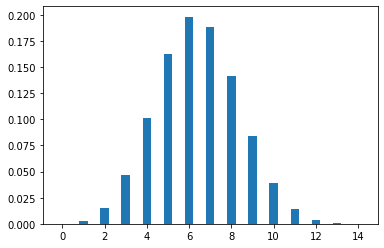

In [107]:
values = np.array([])
pmf_values = np.array([])
for i in range(15):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.binom.pmf(n=16, p=0.4, k=i))
plt.bar(values, height=pmf_values, width=0.4)

6 games -~20%

8) Using a seed of 42 (like below), simulate 100 16-game seasons for the Jets. Plot the histogram and boxplot for the result. What is the mean number of wins in your simulated 100 seasons? What is the median? What is the standard deviation? Is the mean the same or different than the expected number of games that they will win? Why or why not?

In [108]:
np.random.seed(42)
dist = stats.binom(n=16, p=0.4)
results = dist.rvs(size=100)
print(results)

[ 6 10  8  7  4  4  3  9  7  7  3 10  8  5  5  5  5  6  6  5  7  4  5  6
  6  8  5  6  7  3  7  5  3 10 10  8  5  4  7  6  4  6  3  9  5  7  5  6
  7  5 10  8  9  9  7  9  4  5  3  5  6  5  8  6  5  7  4  8  4 11  8  5
  2  8  7  8  8  4  6  4  9  7  6  3  5  5  8  7  9  6  4  7  8  7  8  6
  6  6  3  4]


In [109]:
dist.mean()

6.4

In [110]:
dist.median()

6.0

In [111]:
dist.std()

1.9595917942265424

The mean is approximately the same as the number of expected number of games that they will win. This is because the mean the binomial distribution is the same experiment 100 times in which the mean will be the same as the expected number of games that they will win.

9) Imagine they made the playoffs. Wow! Now the odds of winning each game has gone down to 25% because the competition is harder. They need to win all four games remaining to win the Super Bowl. What are their odds of winning the Super Bowl?

In [112]:
np.random.seed(42)
dist = stats.binom(n=4, p=0.25)
print(dist.rvs()/4)

0.25


10) Given what we discussed in class, why might this example not follow a binomial distribution? Or - what would cause it to not follow a binomial distribution?

This may not follow the binomial distribution because the trials are not independent from each other. Winning one game changes the ability to play the second game.

11) Say that, as per polling, that Joe Biden has a 50% chance of winning the Iowa primary in February. If I poll ten voters, what is the probability that exactly five of them will vote for him?

In [113]:
np.random.seed(42)
dist = stats.binom(n=10, p=0.5)
dist.pmf(5)

0.24609375000000025

12) What is the probabilty that between three and five of the voters will vote for him?

In [114]:
dist.cdf(5)-dist.cdf(1)-dist.cdf(2)

0.5576171874999999

13) What are the odds that the second person I ask will vote for Joe Biden?

In [115]:
dist.pmf(2)

0.04394531249999999

14) What are the odds that the second person I ask is the first person I speak to who will vote for Joe Biden?

In [116]:
dist = stats.geom(0.5)
dist.pmf(2)

0.25

15) Stock A has a 70% chance of going down next year, which would cost your portfolio \\$100,000 if that were to happen. It has a 30% chance of going up, which would bring $500,000 to your portfolio. Should you invest in Stock A? What is your expected net return in this scenario? 

In [117]:
print((.3*500000)-(.7*100000))

80000.0


Yes you should invest in Stock A, the expected net return in this scenario is $80,000.